## Importing libraries

In [1]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading excel files

In [2]:
Training_data=pd.read_excel(r'C:\Users\HP\Dropbox\PC\Desktop\project\Copy of Model_Set.xlsx', sheet_name="Training") 
Test_data=pd.read_excel(r'C:\Users\HP\Dropbox\PC\Desktop\project\Copy of Model_Set.xlsx', sheet_name="Test") 

SourceData_train_independent= Training_data.drop(["Impedence"], axis=1)
SourceData_train_dependent=Training_data["Impedence"].copy()

SourceData_test_independent=Test_data.drop(["Impedence"], axis=1)
SourceData_test_dependent=Test_data["Impedence"].copy()

## creating regression model

In [3]:
sc_X = StandardScaler()

X_train=sc_X.fit_transform(SourceData_train_independent.values)
y_train=SourceData_train_dependent

X_test=sc_X.transform(SourceData_test_independent)
y_test=SourceData_test_dependent
reg = LinearRegression().fit(X_train, y_train)
print("The Linear regression score on training data is ", round(reg.score(X_train, y_train),2))
predict=reg.predict(X_test)
print(predict)

The Linear regression score on training data is  0.98
[68.73596021 83.86690755 82.42445515 74.62761173 72.09589235 74.48146289
 74.95182217 83.39800351 81.98908576 80.11515005 68.83888713 75.6393681
 78.21899298 87.80018201 71.95558428 72.4482886  93.6211964  81.62563321]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


## plots

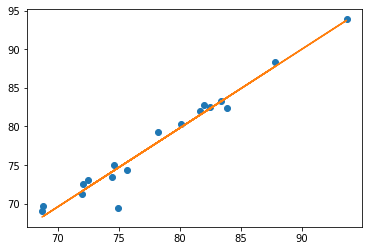

In [4]:

import matplotlib.pyplot as plt
plt.plot(predict, SourceData_test_dependent, 'o')
m, b = np.polyfit(predict, SourceData_test_dependent, 1)
plt.plot(predict, m*predict+b)


## Ploting Errors 

In [8]:

from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(predict,SourceData_test_dependent)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(predict,SourceData_test_dependent) #default=True
rmse = mean_squared_error(predict,SourceData_test_dependent,squared=False)
  
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("Root mean square error:",rmse)

Mean Absolute Error: 0.8771675680278039
Mean Squared Error: 2.1978306391507423
Root mean square error: 1.4825082256603983


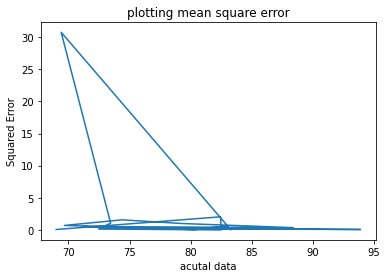

In [9]:
theta_values = np.linspace(0, 6, 244)


def sqr_err(predict, SourceData_test_dependent):
    if len(predict) != len(SourceData_test_dependent):
        raise IndexError("Mismathced array sizes, you inputted arrays with sizes {} and {}".format(len(predict),
                                                                                                  len(SourceData_test_dependent)))
    else:
        length = len(predict)

    sqrerror_out = [(SourceData_test_dependent[i]-predict[i])**2 for i in range(length)]

    return np.array(sqrerror_out)

Squared_error = sqr_err(predict, SourceData_test_dependent)

plt.figure()
plt.plot(SourceData_test_dependent, Squared_error,)
plt.title("plotting mean square error")
plt.xlabel('acutal data')
plt.ylabel('Squared Error')
plt.show()

## Exporting to excel

In [7]:
data=pd.DataFrame({'result': predict})
datatoexcel = pd.ExcelWriter(r'C:\Users\HP\Dropbox\PC\Desktop\project\result.xlsx',engine='xlsxwriter')
data.to_excel(datatoexcel,sheet_name='result')
datatoexcel.save()
